#최근접 이웃의 한계 -> 학습 데이터에만 의지 

In [34]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [35]:
from sklearn.model_selection import train_test_split



#훈련세트와 테스트 세트로 나누기

In [36]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#훈련세트와 테스트세트를 2차원 배열로 바꾸기

In [37]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

#k-최근접 이웃 회귀 모델 훈련

In [39]:
knr.fit(train_input, train_target)
print(knr.predict([[50]]))

import matplotlib.pyplot as plt

[1033.33333333]


#50cm 농어의 이웃을 구함


In [40]:
distances, indexes = knr.kneighbors([[50]])

#훈련 세트의 산점도를 그림

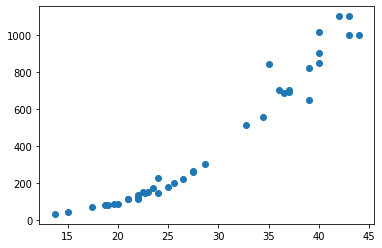

In [41]:
plt.scatter(train_input, train_target)

#훈련 세트 중에서 이웃 샘플만 다시 그림

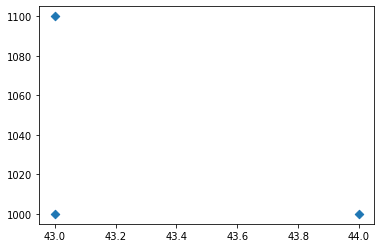

In [42]:
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#50cm 농어 데이터

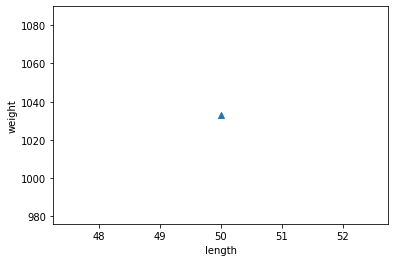

In [43]:
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [44]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


#100cm 농어의 이웃 구하기

In [45]:
distances,indexes = knr.kneighbors([[100]])

#훈련 세트의 산점도를 그림

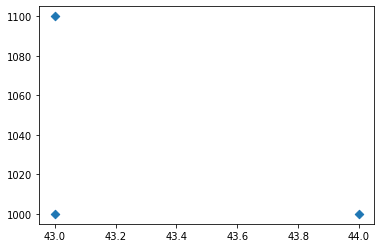

In [46]:
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

#100cm 농어 데이터

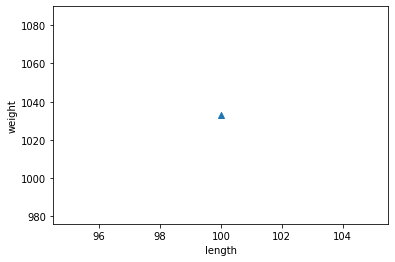

In [47]:
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#선형회귀


In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#선형 회귀 모델을 훈련

In [49]:
lr.fit(train_input, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#50cm 농어에 대해 예측 

In [50]:
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


#훈련세트의 산점도를 그림

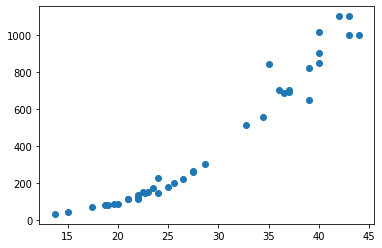

In [51]:
plt.scatter(train_input, train_target)

#15에서 50까지 1차 방정식 그래프를 그림

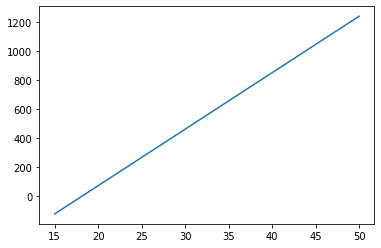

In [52]:

plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터

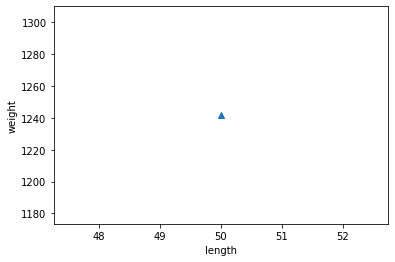

0.9398463339976039
0.8247503123313558


In [53]:
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() 

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#다항회귀


In [54]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


#구간별 직선을 그리기 위해 15~49까지 정수 배열 만듬

In [55]:
point = np.arange(15,50)

#훈련 세트의 산점도를 그립니다

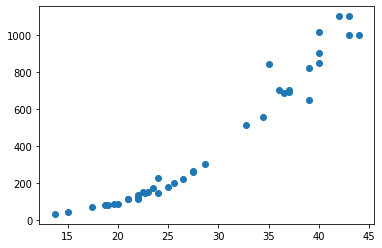

In [56]:
plt.scatter(train_input, train_target)

#15에서 49까지 2차 방정식 그래프를 그림

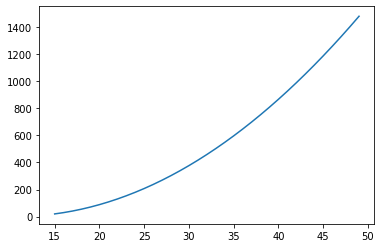

In [57]:
plt.plot(point, 1.01*point**2 - 21.6*point+116.05)

#50cm 농어 데이터 

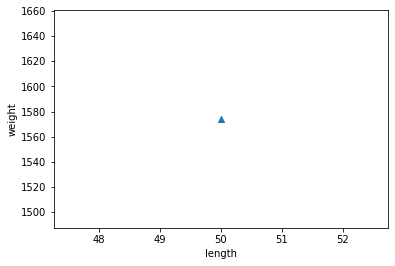

0.9706807451768623
0.9775935108325122


In [58]:
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))